# Árboles de Regresión

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mainpath = "C:/Users/Esneider Infante/Documentos/Python Machine Learning Udemy/python-ml-course/datasets/"
filename = "boston/Boston.csv"
fullpath = mainpath+filename
data = pd.read_csv(fullpath)

In [3]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.shape

(506, 14)

In [5]:
colnames = data.columns.values.tolist()
predictors =  colnames[:13]
target = colnames[13]
X=data[predictors]
Y=data[target]

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [7]:
regtree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, random_state=0)

In [8]:
regtree.fit(X,Y)

DecisionTreeRegressor(min_samples_leaf=10, min_samples_split=30, random_state=0)

In [9]:
preds = regtree.predict(data[predictors])

In [10]:
data["preds"] = preds

In [12]:
data[["preds","medv"]]

,preds,medv
0,22.840000,24.0
1,22.840000,21.6
2,35.247826,34.7
3,35.247826,33.4
4,35.247826,36.2
...,...,...
501,22.840000,22.4
502,20.624138,20.6
503,28.978261,23.9
504,31.170000,22.0


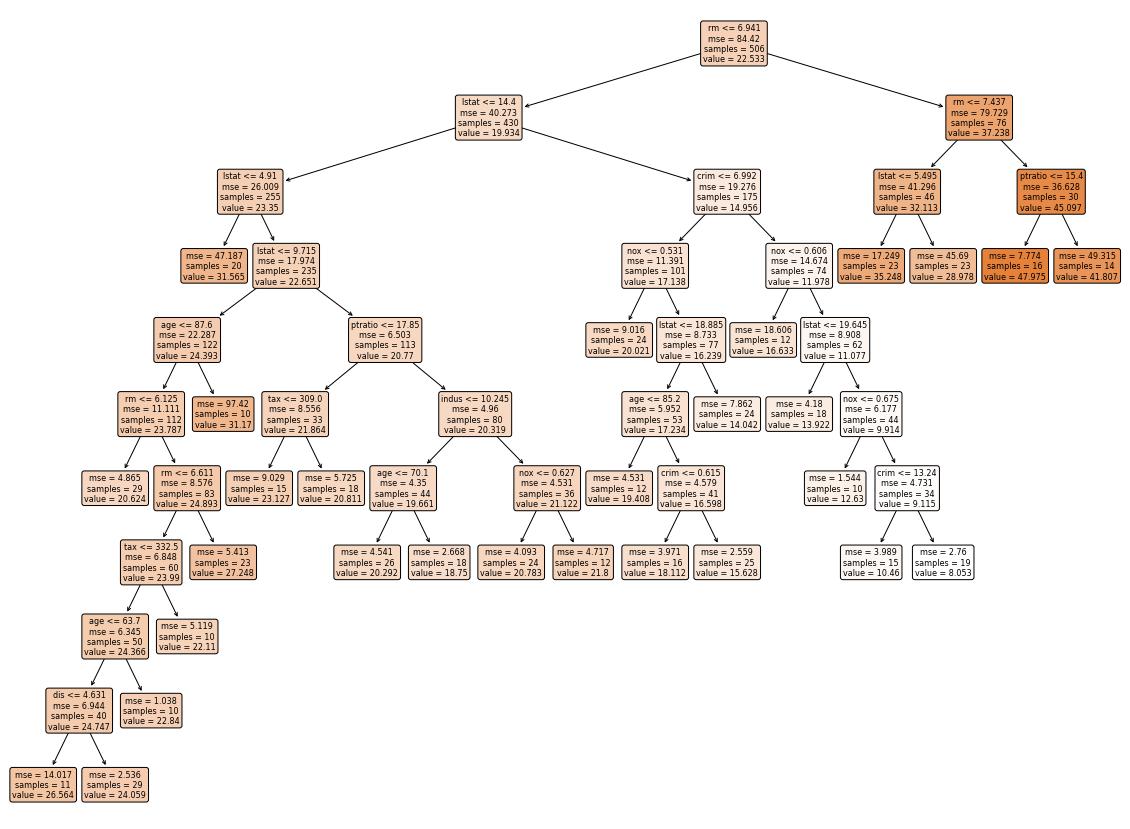

In [19]:
plt.figure(figsize=(20,15))
tree.plot_tree(regtree,feature_names=predictors,class_names=target,
               filled=True, rounded=True, fontsize=8);

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [26]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(regtree,X,Y,scoring="neg_mean_squared_error",cv=cv, n_jobs=1)
score = np.mean(scores)
print(scores)
print(score)
#Extraño error negativo

[-13.64925886 -17.28987161 -16.98569707 -47.56954086  -9.26202865
 -17.23057023 -15.41541493 -31.33011027 -22.79877067  -9.54180723]
-20.107307036443846


In [29]:
list(zip (predictors,regtree.feature_importances_))

[('crim', 0.03421203230639308),
 ('zn', 0.0),
 ('indus', 0.0011605887788380146),
 ('chas', 0.0),
 ('nox', 0.01856163073811432),
 ('rm', 0.6308568014337028),
 ('age', 0.01725115143448847),
 ('dis', 0.0013745115995791378),
 ('rad', 0.0),
 ('tax', 0.0023698305298803803),
 ('ptratio', 0.009333247332530954),
 ('black', 0.0),
 ('lstat', 0.28488020584647283)]

# Random Rorest

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
forest = RandomForestRegressor(n_jobs=2, oob_score=True, n_estimators=500)
forest.fit(X,Y)

RandomForestRegressor(n_estimators=500, n_jobs=2, oob_score=True)

In [42]:
data["rforest_pred"] = forest.oob_prediction_
data[["rforest_pred","medv"]]

,rforest_pred,medv
0,28.621519,24.0
1,22.544737,21.6
2,34.189529,34.7
3,34.792638,33.4
4,34.447340,36.2
...,...,...
501,23.816000,22.4
502,18.400000,20.6
503,27.095706,23.9
504,26.240678,22.0


In [43]:
data["rforest_error2"] = (data["rforest_pred"]-data["medv"])**2
sum(data["rforest_error2"])/len(data)

10.184059608007013

In [44]:
#similar al R^2
forest.oob_score_

0.8793637390231266